In [2]:
# Librerías para trabajar con datos
import pandas as pd  # Para manejar datos en tablas
import numpy as np   # Para operaciones numéricas

# Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se vean bien
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
import pandas as pd

# Cargar el archivo CSV desde la ruta local
df = pd.read_csv(r'C:\Analisis de datos\CAR DETAILS FROM CAR DEKHO.csv')

# Ver las primeras filas del dataset
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Ver la estructura del dataset
df.info()

# Ver estadísticas descriptivas de las columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
# Verificar si hay valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Verificar si hay filas duplicadas
print("\nCantidad de filas duplicadas:", df.duplicated().sum())


Valores nulos por columna:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Cantidad de filas duplicadas: 763


In [9]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

# Eliminar la columna 'name' solo si existe
if 'name' in df.columns:
    df = df.drop(columns=['name'])

# Verificamos la nueva forma del DataFrame
df.shape


(3498, 7)

In [10]:
# Mostrar los tipos de datos para identificar columnas categóricas
df.dtypes


year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [11]:
# Convertir variables categóricas en variables dummies (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificamos el nuevo DataFrame
df_encoded.head()


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


In [12]:
# Variable objetivo
y = df_encoded['selling_price']

# Variables independientes (todas las demás, menos 'selling_price')
X = df_encoded.drop('selling_price', axis=1)


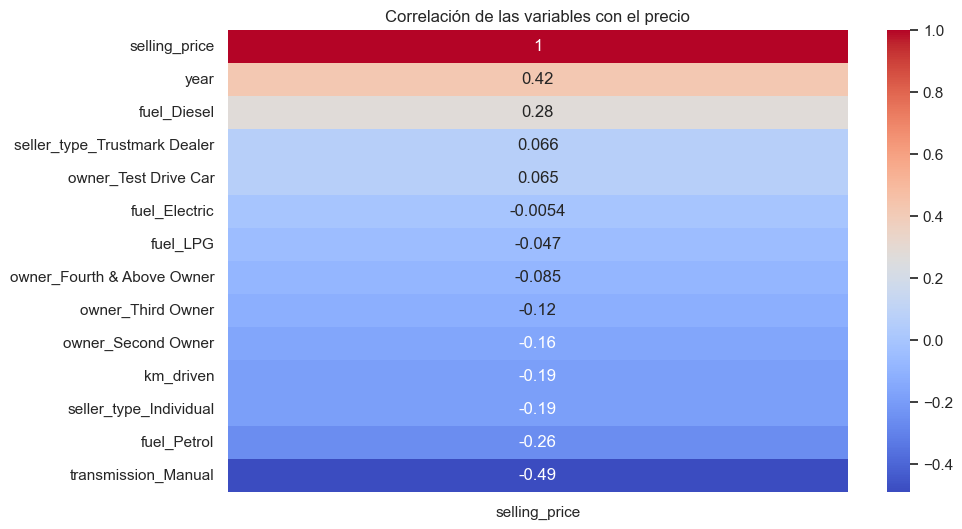

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear matriz de correlación
correlation_matrix = df_encoded.corr()

# Mostrar correlación con la variable objetivo
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[['selling_price']].sort_values(by='selling_price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de las variables con el precio')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Dividir datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas (shapes) de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (2798, 13)
Tamaño de X_test: (700, 13)
Tamaño de y_train: (2798,)
Tamaño de y_test: (700,)


In [16]:
from sklearn.model_selection import train_test_split

# 80% para entrenar, 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)

# Evaluar con métricas
print('MSE (Error Cuadrático Medio):', mean_squared_error(y_test, y_pred))
print('R² (Coeficiente de Determinación):', r2_score(y_test, y_pred))


MSE (Error Cuadrático Medio): 194539409801.70367
R² (Coeficiente de Determinación): 0.39627303011923276


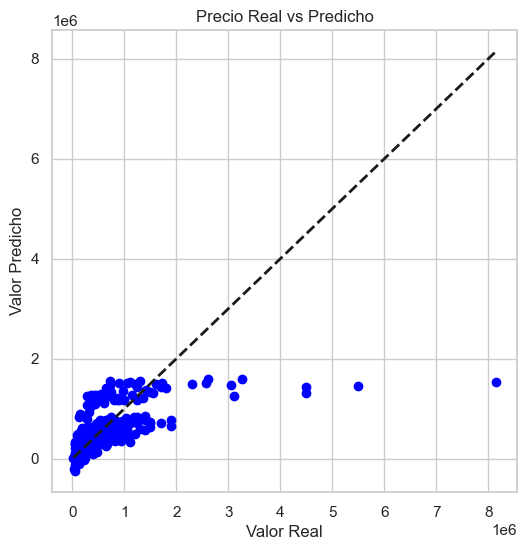

In [19]:
# Comparar predicciones con valores reales
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Precio Real vs Predicho')
plt.show()
